 I predicted the price of the car using the variables or features. This is just an estimate but should give an objective idea of how much the car should cost.

Some questions I want to answer.

Do I know if the dealer is offering fair value for my trade-in?


Do I know if I put a fair value on my car?

In [ ]:
!pip install pandas matplotlib scipy scikit-learn skillsnetwork

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.6 MB/s eta 0:00:00


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv -O automobileEDA.csv

--2025-02-13 08:36:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35648 (35K) [text/csv]
Saving to: ‘automobileEDA.csv’

automobileEDA.csv   100%[===================>]  34.81K  --.-KB/s    in 0.02s   

2025-02-13 08:36:51 (2.17 MB/s) - ‘automobileEDA.csv’ saved [35648/35648]



In [ ]:
df = pd.read_csv('automobileEDA.csv', header=0)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>

<p>Simple Linear Regression is used to understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that I want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
Y: Response \ Variable\\\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, (the value of Y when X is 0)</li>
    <li>b refers to the <b>slope</b> of the regression line, (the value with which Y changes when X increases by 1 unit)</li>
</ul>


I loaded the modules for linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help predict car price?</h4>


Using simple linear regression, I created a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [ ]:
X = df[['highway-mpg']]
Y = df['price']

Then I fit the linear model using highway-mpg

In [ ]:
lm.fit(X,Y)

LinearRegression()

Then I ouput a prediction:

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

I determined the value of intercept (a) and slope (b)

In [ ]:
print(f"The intercept is: {lm.intercept_}")
print(f"The slope is: {lm.coef_}")

The intercept is: 38423.3058581574
The slope is: [-821.73337832]


<h3>The final estimated linear model</h3>


The final linear model with the structure:

$$
Yhat = a + b X
$$

Plugging in the Values:

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


In [ ]:
Yhat = 38423.31 - 821.73*X

Price = 38423.31 - 821.73*df['highway-mpg']

<h4>Multiple Linear Regression</h4>


The equation is given by:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


From the Exploratory Data Analysis, good predictors of price could be:
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

I developed a model using these variables as the predictor variables.


In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

I fitted the linear model using the the selected predictor variables.


In [ ]:
lm.fit(Z, df['price'])

LinearRegression()

I determined the value of the intercept (a) and the coefficients (b1, b2, b3, b4)

In [ ]:
print (f"The intercept is: {lm.intercept_}")
print (f"The coefficients of (b1, b2, b3, b4) are: {lm.coef_}")

The intercept is: -15806.62462632922
The coefficients of (b1, b2, b3, b4) are: [53.49574423  4.70770099 81.53026382 36.05748882]


The linear function is:

<b>Price</b> = -15806.62462632918 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>


<h2> Model Evaluation Using Visualization</h2>


I evaluated the models developed by using visualization.

I imported the visualization package, seaborn:

In [ ]:
import seaborn as sns
%matplotlib inline

# Regression Plot

This plot shows a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data.

I visualized highway-mpg as a potential predictor variable of price:

(0.0, 48184.988343411445)

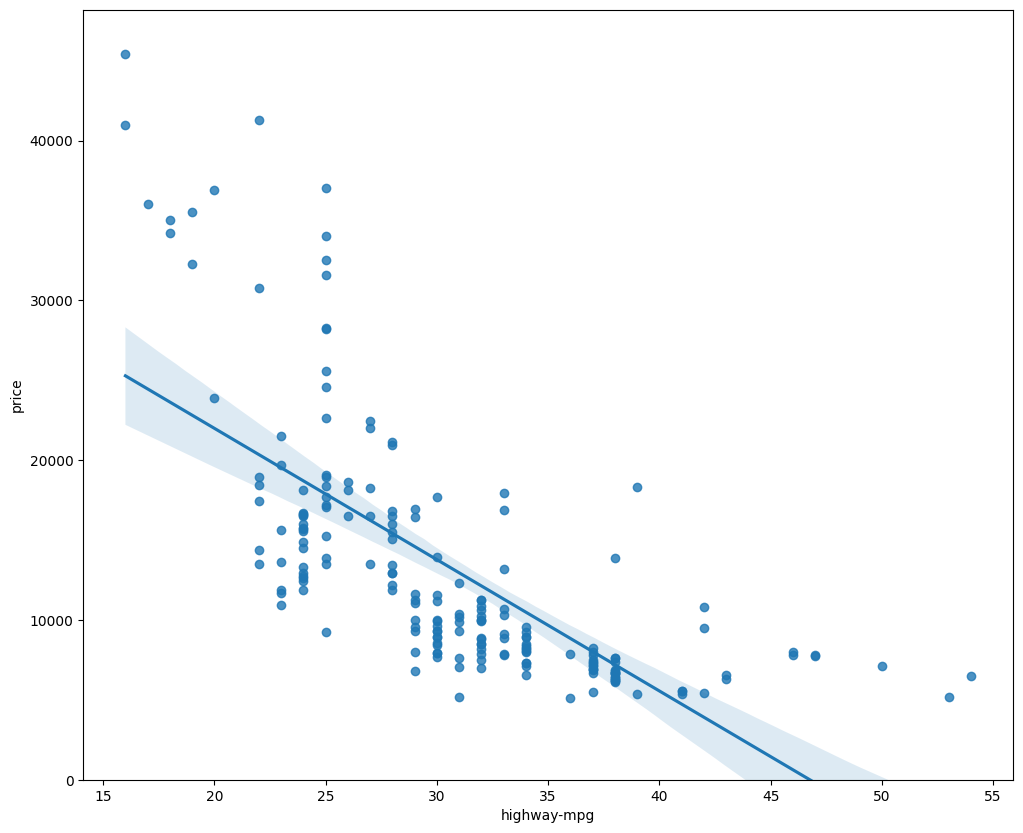

In [ ]:
width=12
height=10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

The price is negatively correlated to highway-mpg since the regression slope is negative.

I created the regression plot of peak-rpm

(0.0, 47414.1)

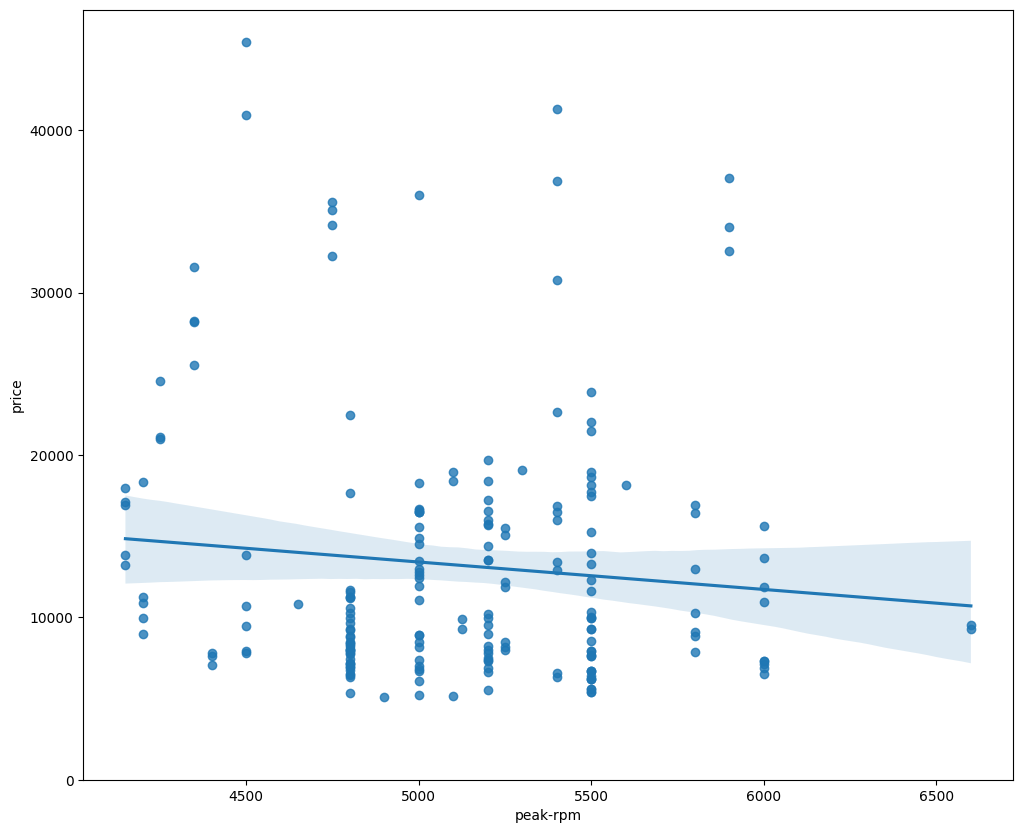

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


# Residual Plot

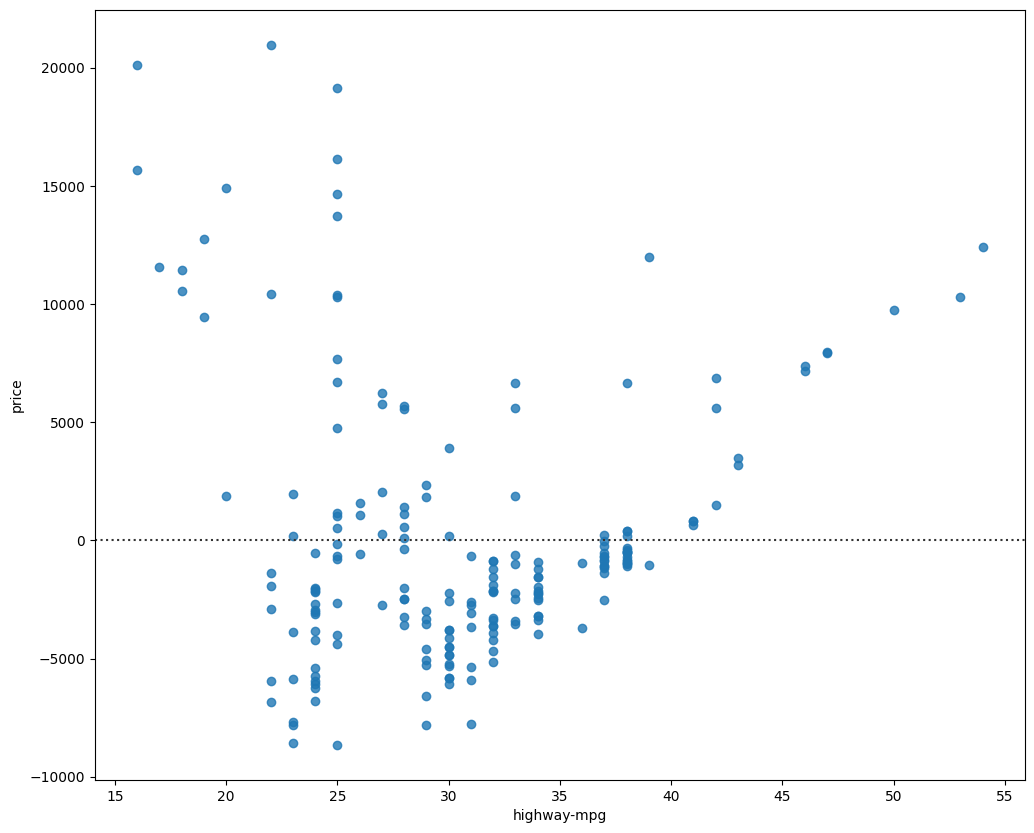

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

<h3>Multiple Linear Regression - Distribution Plot</h3>





In [ ]:
Y_hat = lm.predict(Z)


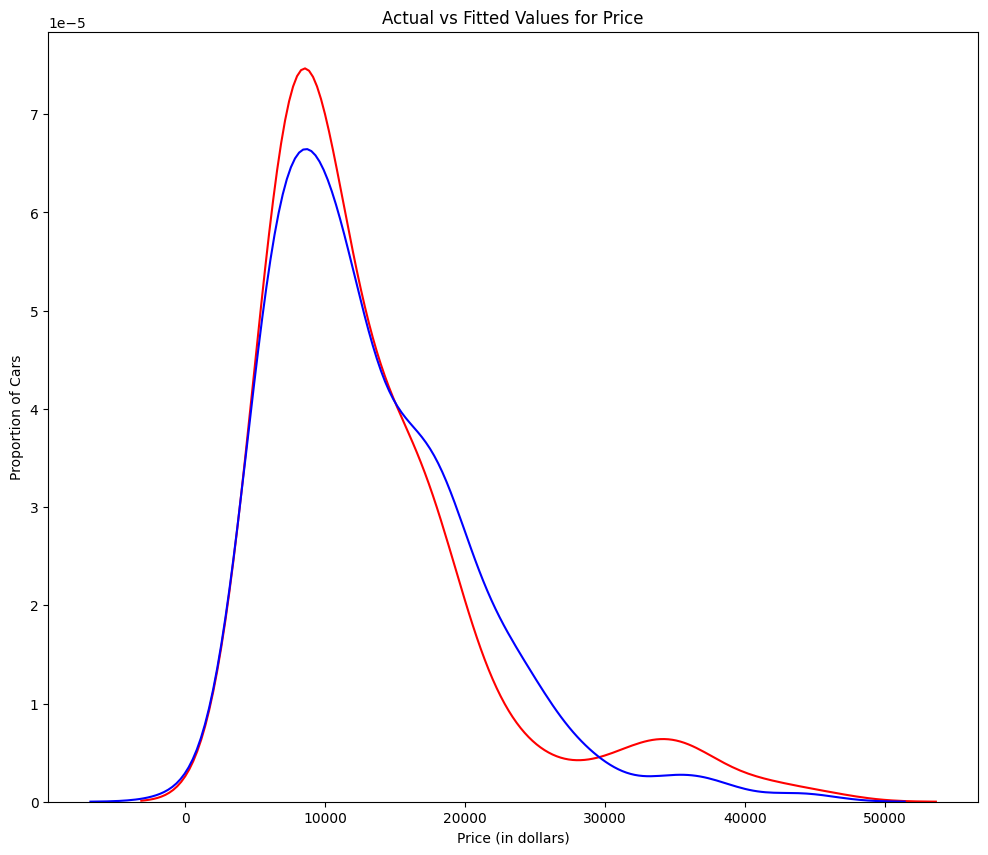

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The fitted values are reasonably close to the actual values since the two distributions overlap a bit.

<h2>Polynomial Regression and Pipelines</h2>


In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


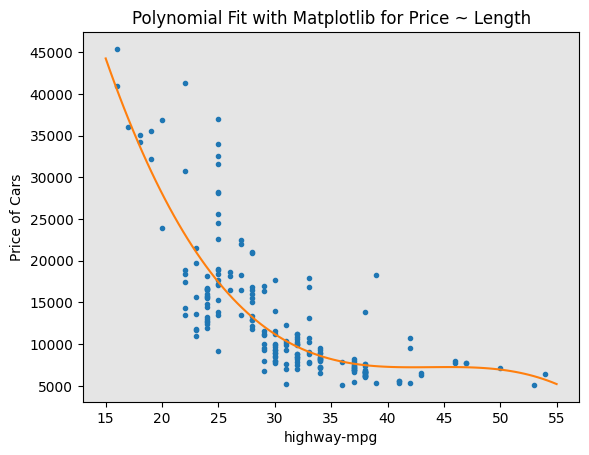

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

This polynomial model performs better than the linear model because the generated polynomial function "hits" more of the data points.

# Polynomial Transform

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape

(201, 4)

In [ ]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


I used the module Pipeline to create a pipeline. I also used StandardScaler as a step in the pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

I inputted the list into the pipeline constructor as an argument.

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

I converted the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then I normalized the data, perform a transform, fit the model simultaneously and produce a prediction.

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2> Measures for In-Sample Evaluation</h2>


<h3>Model 1: Simple Linear Regression</h3>


I calculated the R^2:



In [ ]:
lm.fit(X, Y)

print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


~49.659% of the variation of the price is explained by this simple linear model built using the highway_mpg data.

I calculated the MSE:

In [ ]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>


I calculated the R^2:



In [ ]:
lm.fit(Z, df['price'])

print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

I calculated the MSE.

I first produced a prediction:

In [ ]:
Y_predict_multifit = lm.predict(Z)

Then I compared the predicted results with the actual results:

In [ ]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>


I calculated the R^2.

I first imported the function r2_score from the module metrics.

In [ ]:
from sklearn.metrics import r2_score

I applied the function to get the value of R^2:

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


~67.419 % of the variation of price is explained by this polynomial fit.

<h3>MSE</h3>


In [ ]:
mean_squared_error(df['price'], p(x))

20474146.426361218

<h2>Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, I trained the model using the method <b>fit</b>. Now I used the method <b>predict</b> to produce a prediction. I imported <b>pyplot</b> for plotting; I also used some functions from numpy.</p>


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

I created a new input:


In [ ]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

I fitted the model:


In [ ]:
lm.fit(X, Y)
lm

LinearRegression()

I produced a prediction:


In [ ]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

I plotted the data:

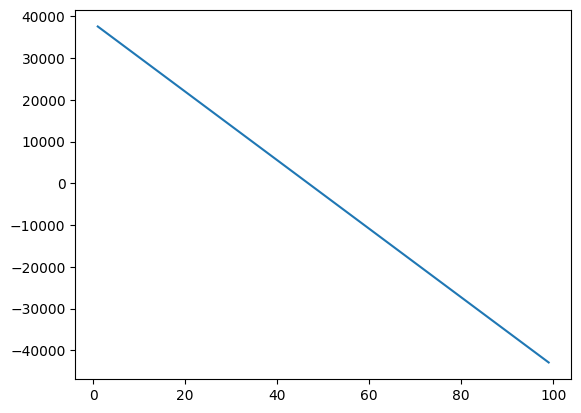

In [ ]:
plt.plot(new_input, yhat)
plt.show()

<h2>Decision Making: Determining a Good Model Fit</h2>


After I've visualized the different models, and generated the R-squared and MSE values for the fits, I determined a good model fit.

When comparing models, the model with the <b>higher R-squared value</b> and  the <b>smallest MSE value</b>. is a better fit for the data.

 <h3>Values for the different models:<h3>

<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>In order to compare the results of the MLR vs SLR models, I looked at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li>
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, it can be concluded that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion</h2>

<p>Comparing these three models, it can be concluded that <b>the MLR model is the best model</b> to be able to predict price from the dataset.</p>
